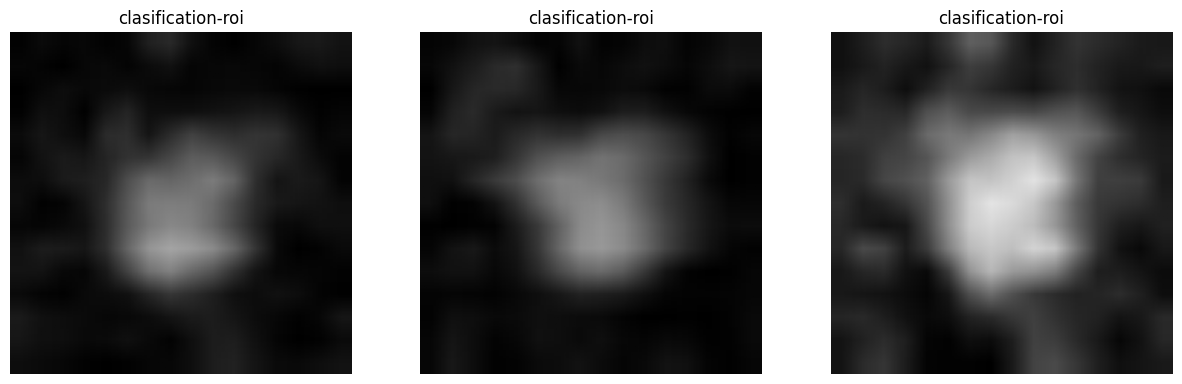

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

# Load the dataset
dataset = datasets.ImageFolder("C:/infosys_springboard_internship", transform=transform)
class_names = dataset.classes

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_random_images(data_loader, class_names, num_images=3):
    for class_index, class_name in enumerate(class_names):
        # Filter the dataset for the specific class
        images = []
        labels = []
        for img, label in dataset:
            if label == class_index:
                images.append(img)
                labels.append(label)
            if len(images) == num_images:
                break

        # Display the images
        plt.figure(figsize=(15, 5))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert CHW to HWC
            plt.title(class_name)
            plt.axis('off')
        plt.show()

display_random_images(data_loader, class_names)


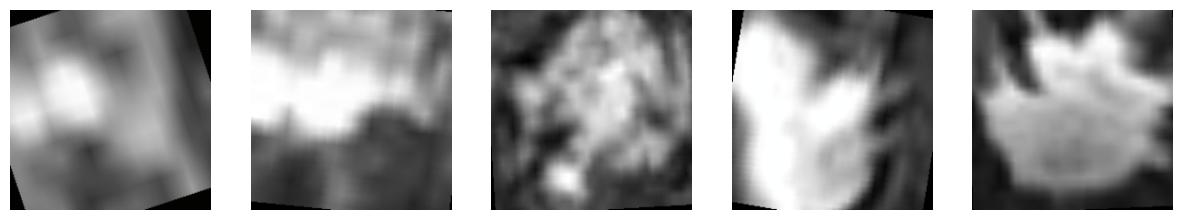

In [5]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the transformations, including data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),              # Resize images to 224x224
    transforms.RandomHorizontalFlip(),          # Randomly flip images horizontally
    transforms.RandomVerticalFlip(),            # Randomly flip images vertically
    transforms.RandomRotation(20),              # Randomly rotate images by 20 degrees
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Randomly zoom
    transforms.ColorJitter(contrast=0.1),       # Random contrast adjustment
    transforms.ToTensor(),                      # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Normalize using ImageNet mean and std
                         std=[0.229, 0.224, 0.225]),
])

# Load the dataset
dataset = datasets.ImageFolder("C:/infosys_springboard_internship", transform=transform)

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_augmented_images(data_loader, num_images=5):
    plt.figure(figsize=(15, 5))
    data_iter = iter(data_loader)
    
    for i in range(num_images):
        # Fetch a batch of images and labels
        images, labels = next(data_iter)
        
        # Select the first image from the batch
        augmented_image = images[0]
        
        # Undo normalization for displaying the image properly
        augmented_image = augmented_image.permute(1, 2, 0).numpy()  # Convert CHW to HWC
        augmented_image = augmented_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        augmented_image = np.clip(augmented_image, 0, 1)  # Ensure values are within [0, 1] for display
        
        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(augmented_image)
        plt.axis('off')
    
    plt.show()

display_augmented_images(data_loader)


In [ ]:
"C:\infosys_springboard_internship"